In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

# Hipóteses

## Primeira hipótese
*É possível agrupar os usuários de acordo com o tipo de comida que consomem*
- MntWines
- MntFruits
- MntMeatProducts
- MntFishProducts
- MntSweetProducts
- MntGoldProds

## Segunda hipótese
*É possível agrupar os usuários de acordo com a forma de compra*
- NumDealsPurchases
- NumWebPurchases
- NumCatalogPurchases
- NumStorePurchases

## Terceira hipótese
*Clientes com famílias maiores possuem menor tempo desde a última compra*

## Quarta hipótese
*Um determinado grupo (cluster) tende a ser mais afetado pelo mkt*

## Quinta hipótese
*Os clientes de renda mais baixa representam que quantidade das compras? Pertencem a um grupo específico?*

## Sexta hipótese
*Quem tende a comprar mais? Solteiros ou casados? Quem compra com mais frequência?*

In [2]:
dataset = pd.read_csv("../data/dataset.csv")

In [47]:
# Cria a forma de agrupar os clientes no tipo de produto
x_produto = dataset[[
    "MntWines", "MntFruits", "MntMeatProducts",
    "MntFishProducts", "MntSweetProducts", "MntGoldProds"
]]
cluster_produto = KMeans(n_clusters=6, random_state=0)
cluster_produto.fit(x_produto.values)

est_cluster_produto = {
    "0": [],
    "1": [],
    "2": [],
    "3": [],
    "4": [],
    "5": [],
    "6": [],
    "7": [],
    "8": [],
    "9": [],
    "10": [],
    "11": []
}

for i in range(0, len(x_forma_compra)):
    # Set de informações para o registro em iteração
    campos = [c for c in x_produto.columns]
    produtos = [v for v in x_produto.values[i]]
    cluster_classificado = str(cluster_produto.labels_[i])
    
    # Ordena (bolha) para descobrir os métodos mais utilizados
    total = len(produtos)
    for j in range(0, total):
        for k in range(j, total):
            pivot = produtos[j]
            
            if pivot < produtos[k]:
                produtos[j], produtos[k] = produtos[k], pivot
                campos[j], campos[k] = campos[k], campos[j]
    
    # Registra o resultado na chave do cluster
    est_cluster_produto[cluster_classificado].append(campos[0])
    est_cluster_produto[cluster_classificado].append(campos[1])
    
# Sumariza e descreve o cluster encontrado
for cluster in est_cluster_produto.keys():
    campos = list(set(est_cluster_produto[cluster]))
    res = []
    
    for campo in campos:
        cont = est_cluster_produto[cluster].count(campo)
        res.append(f"{campo}: {cont}")
    print(res)

['MntFishProducts: 1', 'MntGoldProds: 10', 'MntWines: 134', 'MntMeatProducts: 123']
['MntMeatProducts: 748', 'MntSweetProducts: 57', 'MntFishProducts: 129', 'MntFruits: 49', 'MntGoldProds: 366', 'MntWines: 759']
['MntMeatProducts: 355', 'MntSweetProducts: 4', 'MntFishProducts: 20', 'MntFruits: 7', 'MntGoldProds: 72', 'MntWines: 432']
['MntSweetProducts: 6', 'MntMeatProducts: 258', 'MntFishProducts: 8', 'MntGoldProds: 33', 'MntWines: 305']
['MntWines: 126', 'MntMeatProducts: 126']
['MntMeatProducts: 176', 'MntSweetProducts: 1', 'MntFishProducts: 7', 'MntFruits: 1', 'MntGoldProds: 2', 'MntWines: 165']
[]
[]
[]
[]
[]
[]


In [43]:
# Cria a forma de agrupar os clientes na forma de compra
x_forma_compra = dataset[[
    "NumDealsPurchases", "NumWebPurchases",
    "NumCatalogPurchases", "NumStorePurchases"
]]
cluster_forma_compra = KMeans(n_clusters=4, random_state=0)
cluster_forma_compra.fit(x_forma_compra.values)

est_cluster_compra = {
    "0": [],
    "1": [],
    "2": [],
    "3": [],
    "4": [],
    "5": [],
    "6": [],
    "7": [],
    "8": [],
    "9": [],
    "10": [],
    "11": []
}

for i in range(0, len(x_forma_compra)):
    # Set de informações para o registro em iteração
    campos = [c for c in x_forma_compra.columns]
    formas = [v for v in x_forma_compra.values[i]]
    cluster_classificado = str(cluster_forma_compra.labels_[i])
    
    # Ordena (bolha) para descobrir os métodos mais utilizados
    total = len(formas)
    for j in range(0, total):
        for k in range(j, total):
            pivot = formas[j]
            
            if pivot < formas[k]:
                formas[j], formas[k] = formas[k], pivot
                campos[j], campos[k] = campos[k], campos[j]
    
    # Registra o resultado na chave do cluster
    est_cluster_compra[cluster_classificado].append(campos[0])
    
# Sumariza e descreve o cluster encontrado
for cluster in est_cluster_compra.keys():
    campos = list(set(est_cluster_compra[cluster]))
    res = []
    
    for campo in campos:
        cont = est_cluster_compra[cluster].count(campo)
        res.append(f"{campo}: {cont}")
    print(res)

['NumCatalogPurchases: 146', 'NumWebPurchases: 39', 'NumStorePurchases: 90']
['NumCatalogPurchases: 2', 'NumWebPurchases: 23', 'NumStorePurchases: 450']
['NumDealsPurchases: 81', 'NumWebPurchases: 267', 'NumStorePurchases: 115']
['NumDealsPurchases: 198', 'NumCatalogPurchases: 5', 'NumWebPurchases: 127', 'NumStorePurchases: 697']
[]
[]
[]
[]
[]
[]
[]
[]


In [ ]:
# Avaliando número de clusters para o tipo de produto
inercia = []
for i in range(1, 11):
    cluster = KMeans(n_clusters=i, random_state=0)
    cluster.fit(x_produto.values)
    inercia.append(cluster.inertia_)
    
plt.plot(range(1, 11), inercia)
plt.xlabel("Número de clusters")
plt.ylabel("Inércia") 
plt.show()

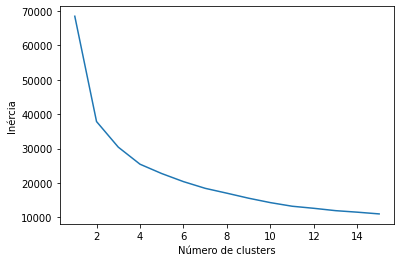

In [31]:
# Avaliando número de clusters para a forma de compra
inercia = []
for i in range(1, 16):
    cluster = KMeans(n_clusters=i, random_state=0)
    cluster.fit(x_forma_compra.values)
    inercia.append(cluster.inertia_)
    
plt.plot(range(1, 16), inercia)
plt.xlabel("Número de clusters")
plt.ylabel("Inércia") 
plt.show()

In [65]:
# Define as colunas para agrupamento de clientes
col_grupo_clientes = [
    "Year_Birth",
    "Education",
    "Marital_Status",
    "Income",
    "Kidhome",
    "Teenhome"
]
df_clientes = dataset[col_grupo_clientes].dropna()

# Prepara os dados para agrupamento de perfil de clientes
le_ed = LabelEncoder()
df_clientes["Education"] = le_ed.fit_transform(df_clientes["Education"].values)

le_ec = LabelEncoder()
df_clientes["Marital_Status"] = le_ec.fit_transform(df_clientes["Marital_Status"].values)

# Executa o agrupamento
cluster_clientes = KMeans(n_clusters=6, random_state=0)
cluster_clientes.fit(df_clientes.values)

KMeans(n_clusters=6, random_state=0)

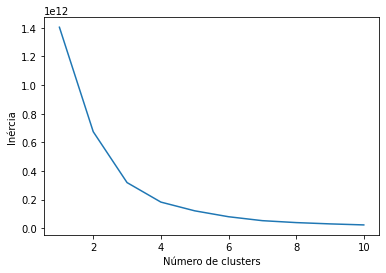

In [64]:
# Executa análise para quantidade de clusters
inercia = []
for i in range(1, 11):
    cluster = KMeans(n_clusters=i, random_state=0)
    cluster.fit(df_clientes.values)
    inercia.append(cluster.inertia_)
    
plt.plot(range(1, 11), inercia)
plt.xlabel("Número de clusters")
plt.ylabel("Inércia") 
plt.show()

In [59]:
df_clientes

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome
0,1957,2,Single,58138.0,0,0
1,1954,2,Single,46344.0,1,1
2,1965,2,Together,71613.0,0,0
3,1984,2,Together,26646.0,1,0
4,1981,4,Married,58293.0,1,0
...,...,...,...,...,...,...
2235,1967,2,Married,61223.0,0,1
2236,1946,4,Together,64014.0,2,1
2237,1981,2,Divorced,56981.0,0,0
2238,1956,3,Together,69245.0,0,1


In [57]:
set(dataset["Teenhome"])

{0, 1, 2}

In [ ]:
# Avaliando número de clusters para o tipo de produto
inercia = []
for i in range(1, 11):
    cluster = KMeans(n_clusters=i, random_state=0)
    cluster.fit(x_produto.values)
    inercia.append(cluster.inertia_)
    
plt.plot(range(1, 11), inercia)
plt.xlabel("Número de clusters")
plt.ylabel("Inércia") 
plt.show()

In [ ]:
x

In [49]:
dataset.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [48]:
dataset

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0
